In [97]:
pip install keras_preprocessing


Note: you may need to restart the kernel to use updated packages.


In [98]:
pip  install matplotlib 


Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [100]:
from keras_preprocessing import image as img
import os
from matplotlib import pyplot as plt

In [101]:
os.system("rm ./simulation/I.txt")

0

In [102]:
sizt = 64
ima = img.load_img(
    "images/monalisa.jpg",
    target_size=(sizt,sizt),
    color_mode="grayscale",

)

In [103]:
img.img_to_array(ima)

array([[[ 93.],
        [118.],
        [ 97.],
        ...,
        [122.],
        [104.],
        [112.]],

       [[ 88.],
        [130.],
        [134.],
        ...,
        [ 83.],
        [ 96.],
        [105.]],

       [[106.],
        [106.],
        [122.],
        ...,
        [ 95.],
        [106.],
        [ 83.]],

       ...,

       [[ 15.],
        [ 12.],
        [ 17.],
        ...,
        [  9.],
        [  4.],
        [  6.]],

       [[  9.],
        [ 14.],
        [ 16.],
        ...,
        [ 10.],
        [  6.],
        [  3.]],

       [[ 10.],
        [ 17.],
        [ 13.],
        ...,
        [  7.],
        [  8.],
        [  7.]]], dtype=float32)

In [104]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

In [105]:
import numpy as np

In [106]:
array = img.img_to_array(ima)
k = 0
l= 0

for i in array:
    for j in i:
        strtmp = f'{hex(int(j[0]))[2:]}'
        strtmp2 = '0'*(2-len(strtmp))+strtmp+' '
        f.write(strtmp2)
        # print(f'{strtmp2}',end='  ')
    f.write("\n")
    # print("\n")
f.close()

In [107]:
out = open("./simulation/IxKernel.txt","r")
def concat(n):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    integ = ('0'*(16-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int("0b"+integ,2)
    if(str(integ[0])=='1'):

        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -(int("0b"+integ,2)+1)
    # print(integ,'h')

    return [a]
klin = []
m=[]
k = out.readlines()
for i in k:
    m.append(list(map(concat,i.split())))


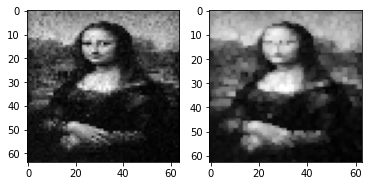

In [108]:
plt.subplot(1,2,1)
plt.imshow(array,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(m,cmap="gray")
plt.show()


In [109]:
os.system("rm ./images/preprocessamento.jpg")
os.system("rm ./images/posprocessamento.jpg")

img.save_img("./images/preprocessamento.jpg",array)
img.save_img("./images/posprocessamento.jpg",m)

hex(1)

In [110]:
hex(1)

'0x1'